# 1. Introduction
The Indian Premier League, or IPL, is a professional Twenty20 cricket league in India. The league was founded in 2008 and has since become one of the most popular sporting events in India and around the world.
The IPL features ten franchise teams representing different cities in India, with players from around the world participating in the league.
The top four teams advance to the playoffs to determine the IPL champion. The league has seen many memorable moments and performances over the years, and is known for its exciting style of cricket, high-scoring matches, and enthusiastic crowds

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',None)


In [3]:
matchdf = pd.read_csv('IPL_Matches_2008_2022.csv')
balldf = pd.read_csv('IPL_Ball_by_Ball_2008_2022.csv')
matchdf.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [4]:
matchdf.shape


(950, 20)

In [5]:
matchdf.isnull().sum()


ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [6]:
matchdf[matchdf['WinningTeam'].isna()]


,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
205,1178424,Bengaluru,2019-04-30,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M.Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe
437,829813,Bangalore,2015-05-17,2015,55,Royal Challengers Bangalore,Delhi Daredevils,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan
464,829763,Bangalore,2015-04-29,2015,29,Royal Challengers Bangalore,Rajasthan Royals,M Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...","['AM Rahane', 'SR Watson', 'SPD Smith', 'KK Na...",JD Cloete,PG Pathak
708,501265,Delhi,2011-05-21,2011,68,Delhi Daredevils,Pune Warriors,Feroz Shah Kotla,Delhi Daredevils,bat,NaN,NaN,NoResults,NaN,NaN,NaN,"['NV Ojha', 'DA Warner', 'MS Wade', 'CA Ingram...","['MK Pandey', 'JP Faulkner', 'SC Ganguly', 'RV...",SS Hazare,RJ Tucker


In [7]:
matchdf.drop(['City','ID','method'],axis=1,inplace=True)


In [8]:
matchdf=matchdf.dropna()


In [9]:
balldf

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [10]:
balldf.shape


(225954, 17)

In [11]:
balldf.isna().sum()


ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

# 2. Creating Batsmen Statistics¶


In [12]:
batgroup=balldf.groupby(['batter'])
batdf=pd.DataFrame(batgroup['ballnumber'].count()).rename(columns={'ballnumber':'balls_faced'})

batdf['innings']=batgroup['innings'].nunique()
batdf['runs'] = batgroup['batsman_run'].sum()

batdf['0s'] = balldf[balldf['batsman_run'] == 0].groupby('batter')['batsman_run'].count()
batdf['0s'].fillna(0,inplace=True)

batdf['1s'] = balldf[balldf['batsman_run'] == 1].groupby('batter')['batsman_run'].count()
batdf['1s'].fillna(0,inplace=True)

batdf['2s'] = balldf[balldf['batsman_run'] == 2].groupby('batter')['batsman_run'].count()
batdf['2s'].fillna(0,inplace=True)

batdf['3s'] = balldf[balldf['batsman_run'] == 3].groupby('batter')['batsman_run'].count()
batdf['3s'].fillna(0,inplace=True)

batdf['4s'] = balldf[balldf['batsman_run'] == 4].groupby('batter')['batsman_run'].count()
batdf['4s'].fillna(0,inplace=True)

batdf['6s'] = balldf[balldf['batsman_run'] == 6].groupby('batter')['batsman_run'].count()
batdf['6s'].fillna(0,inplace=True)

batdf['player_out']=batgroup['player_out'].count()

# 3. Derived variable - Batsman Average & Strike Rate


In [13]:
batdf['bat_average'] = round(batdf['runs']/batdf['player_out'],2)
batdf['bat_average'].fillna(0,inplace=True)
batdf['bat_strike'] = round(batdf['runs']/batdf['balls_faced']*100,2)
batdf['bat_strike'].fillna(0,inplace=True)

In [14]:
batdf.head()


,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike
batter,,,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0,15,18.67,142.86
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,7.0,9,17.89,115.83
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,1,4.00,57.14
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,5,10.60,70.67
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0,2,12.50,125.00


# 4. Creating Bowler Statistics

In [15]:
bowlgroup = balldf.groupby(['bowler'])


bowldf = pd.DataFrame(bowlgroup['ballnumber'].count()).rename(columns={'ballnumber':'balls_bowled'})


bwl_wkts = balldf[balldf['kind'].isin(['caught','bowled', 'lbw','stumped', 'caught and bowled', 'hit wicket'])]
bowldf['wickets'] = bwl_wkts.groupby(['bowler'])['ballnumber'].count()
bowldf['wickets'].fillna(0,inplace=True)
 
# Calculating total number of overs bowled
bowldf['overs'] = round(bowldf['balls_bowled']/6)

bowldf['runs_conceded'] = balldf.groupby('bowler')['batsman_run'].sum()
bowldf['runs_conceded'] = bowldf['runs_conceded'].fillna(0)

bowldf['runs_conceded'] = bowldf['runs_conceded'].add(balldf[balldf['extra_type'].isin(['wides','noballs'])].groupby('bowler')['extras_run'].sum(),fill_value=0)

# 5. Bowling Strike Rate & Economy Rate¶

In [16]:
bowldf['bowl_econ'] = round(bowldf['runs_conceded']/bowldf['overs'],2)
bowldf['bowl_strike_rate']=round(bowldf['balls_bowled']/bowldf['wickets'],2)

In [17]:
bowldf

,balls_bowled,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate
bowler,,,,,,
A Ashish Reddy,270,18.0,45.0,396.0,8.80,15.00
A Badoni,12,2.0,2.0,11.0,5.50,6.00
A Chandila,234,11.0,39.0,242.0,6.21,21.27
A Choudhary,108,5.0,18.0,144.0,8.00,21.60
A Dananjaya,25,0.0,4.0,47.0,11.75,inf
...,...,...,...,...,...,...
YK Pathan,1184,42.0,197.0,1415.0,7.18,28.19
YS Chahal,2940,166.0,490.0,3624.0,7.40,17.71
Yash Dayal,205,11.0,34.0,296.0,8.71,18.64


<Axes: >

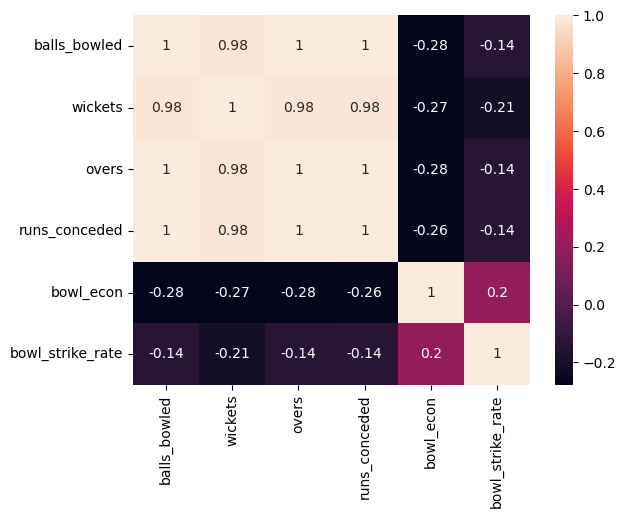

In [18]:
sns.heatmap(bowldf.corr(),annot=True)


# 6. Finding number of matches played by each player¶


In [19]:
balldf

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [20]:
def update_player_with_match(player_name, id):
    if player_name in all_players_dict:
        all_players_dict[player_name].add(id)
    else:
        all_players_dict[player_name] = {id}

# Consider players listed as batsman, non striker or bowler
def update_player_list(x):
    update_player_with_match(x['batter'],x['ID'])
    update_player_with_match(x['non-striker'],x['ID'])
    update_player_with_match(x['bowler'],x['ID'])

In [21]:
all_players_dict = {}
out_temp = balldf.apply(lambda x: update_player_list(x),axis=1)


In [22]:
out_temp

0         None
1         None
2         None
3         None
4         None
          ... 
225949    None
225950    None
225951    None
225952    None
225953    None
Length: 225954, dtype: object

In [23]:
all_players_dict

{'YBK Jaiswal': {1216496,
  1216500,
  1216511,
  1254075,
  1254081,
  1254085,
  1254089,
  1254093,
  1254097,
  1254100,
  1254103,
  1254106,
  1254111,
  1304051,
  1304055,
  1304059,
  1304098,
  1304104,
  1304109,
  1304114,
  1312197,
  1312199,
  1312200},
 'JC Buttler': {980901,
  980909,
  980917,
  980923,
  980927,
  980933,
  980941,
  980947,
  980957,
  980973,
  980981,
  980985,
  980993,
  981007,
  1082592,
  1082597,
  1082600,
  1082602,
  1082606,
  1082612,
  1082614,
  1082618,
  1082625,
  1082628,
  1136564,
  1136566,
  1136571,
  1136575,
  1136577,
  1136581,
  1136588,
  1136592,
  1136598,
  1136600,
  1136603,
  1136607,
  1136609,
  1175359,
  1175363,
  1175367,
  1175369,
  1178396,
  1178400,
  1178402,
  1178407,
  1216500,
  1216504,
  1216507,
  1216511,
  1216514,
  1216518,
  1216522,
  1216527,
  1216530,
  1216533,
  1216537,
  1216543,
  1254061,
  1254064,
  1254069,
  1254073,
  1254075,
  1254081,
  1254085,
  1304051,
  1304055,
  130

In [24]:
all_df = pd.DataFrame({'Players':list(all_players_dict.keys())})


In [25]:
all_df

,Players
0,YBK Jaiswal
1,JC Buttler
2,Mohammed Shami
3,Yash Dayal
4,SV Samson
...,...
647,D Kalyankrishna
648,SB Joshi
649,MA Khote
650,DS Lehmann


In [26]:
all_df['matches'] = all_df['Players'].apply(lambda x: len(all_players_dict[x]))
all_df=all_df.set_index('Players')

In [27]:
all_df

,matches
Players,
YBK Jaiswal,23
JC Buttler,81
Mohammed Shami,93
Yash Dayal,9
SV Samson,134
...,...
D Kalyankrishna,3
SB Joshi,4
MA Khote,3


In [28]:
batdf

,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike
batter,,,,,,,,,,,,
A Ashish Reddy,196,2,280,61.0,83.0,20.0,1.0,16.0,15.0,15,18.67,142.86
A Badoni,139,2,161,57.0,53.0,11.0,0.0,11.0,7.0,9,17.89,115.83
A Chandila,7,1,4,3.0,4.0,0.0,0.0,0.0,0.0,1,4.00,57.14
A Chopra,75,2,53,45.0,21.0,2.0,0.0,7.0,0.0,5,10.60,70.67
A Choudhary,20,2,25,4.0,13.0,1.0,0.0,1.0,1.0,2,12.50,125.00
...,...,...,...,...,...,...,...,...,...,...,...,...
Yash Dayal,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.00,0.00
Yashpal Singh,67,2,47,39.0,20.0,2.0,1.0,5.0,0.0,4,11.75,70.15
Younis Khan,7,1,3,4.0,3.0,0.0,0.0,0.0,0.0,1,3.00,42.86


In [29]:
bowldf

,balls_bowled,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate
bowler,,,,,,
A Ashish Reddy,270,18.0,45.0,396.0,8.80,15.00
A Badoni,12,2.0,2.0,11.0,5.50,6.00
A Chandila,234,11.0,39.0,242.0,6.21,21.27
A Choudhary,108,5.0,18.0,144.0,8.00,21.60
A Dananjaya,25,0.0,4.0,47.0,11.75,inf
...,...,...,...,...,...,...
YK Pathan,1184,42.0,197.0,1415.0,7.18,28.19
YS Chahal,2940,166.0,490.0,3624.0,7.40,17.71
Yash Dayal,205,11.0,34.0,296.0,8.71,18.64


In [30]:
players = pd.merge(all_df,batdf, left_index=True, right_index=True,how='outer')
players = pd.merge(players,bowldf, left_index=True, right_index=True,how='outer')
players.fillna(0,inplace=True)

In [31]:
players

,matches,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike,balls_bowled,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate
A Ashish Reddy,28,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,15.0,18.67,142.86,270.0,18.0,45.0,396.0,8.80,15.00
A Badoni,11,139.0,2.0,161.0,57.0,53.0,11.0,0.0,11.0,7.0,9.0,17.89,115.83,12.0,2.0,2.0,11.0,5.50,6.00
A Chandila,12,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27
A Chopra,6,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,5.0,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00
A Choudhary,5,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,1.0,2.0,12.50,125.00,108.0,5.0,18.0,144.0,8.00,21.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yash Dayal,9,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.00,205.0,11.0,34.0,296.0,8.71,18.64
Yashpal Singh,4,67.0,2.0,47.0,39.0,20.0,2.0,1.0,5.0,0.0,4.0,11.75,70.15,0.0,0.0,0.0,0.0,0.00,0.00
Younis Khan,1,7.0,1.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,1.0,3.00,42.86,0.0,0.0,0.0,0.0,0.00,0.00
Yuvraj Singh,129,2207.0,3.0,2754.0,977.0,741.0,119.0,3.0,218.0,149.0,109.0,25.27,124.78,882.0,36.0,147.0,1077.0,7.33,24.50


In [32]:
balldf

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [33]:

catches_cb = balldf[(balldf['kind'].isin(['caught and bowled']))].groupby('bowler')['ballnumber'].count().rename('bowler_catches')



In [34]:
catches_c = balldf[(balldf['kind'].isin(['caught']))].groupby('fielders_involved')['ballnumber'].count().rename('fielder_catches')


In [35]:
catches_cb

bowler
A Ashish Reddy    1
A Badoni          1
A Chandila        5
A Flintoff        1
A Kumble          1
                 ..
Y Nagar           1
YK Pathan         2
YS Chahal         3
Yuvraj Singh      2
Z Khan            1
Name: bowler_catches, Length: 147, dtype: int64

In [36]:
catches_c

fielders_involved
A Ashish Reddy     8
A Badoni           8
A Chandila         2
A Chopra           2
A Flintoff         3
                  ..
Yash Dayal         1
Yashpal Singh      3
Younis Khan        1
Yuvraj Singh      29
Z Khan            20
Name: fielder_catches, Length: 528, dtype: int64

In [37]:
catches_df = pd.merge(catches_cb,catches_c, left_index=True, right_index=True,how='outer')
catches_df.fillna(0,inplace=True)


In [38]:
catches_df

,bowler_catches,fielder_catches
A Ashish Reddy,1.0,8.0
A Badoni,1.0,8.0
A Chandila,5.0,2.0
A Chopra,0.0,2.0
A Flintoff,1.0,3.0
...,...,...
Yash Dayal,0.0,1.0
Yashpal Singh,0.0,3.0
Younis Khan,0.0,1.0
Yuvraj Singh,2.0,29.0


In [39]:
catches_df['catches'] = catches_df['bowler_catches']+catches_df['fielder_catches']
catches_df.drop(['bowler_catches','fielder_catches'],axis=1,inplace=True)



In [40]:
catches_df

,catches
A Ashish Reddy,9.0
A Badoni,9.0
A Chandila,7.0
A Chopra,2.0
A Flintoff,4.0
...,...
Yash Dayal,1.0
Yashpal Singh,3.0
Younis Khan,1.0
Yuvraj Singh,31.0


In [41]:
players

,matches,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike,balls_bowled,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate
A Ashish Reddy,28,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,15.0,18.67,142.86,270.0,18.0,45.0,396.0,8.80,15.00
A Badoni,11,139.0,2.0,161.0,57.0,53.0,11.0,0.0,11.0,7.0,9.0,17.89,115.83,12.0,2.0,2.0,11.0,5.50,6.00
A Chandila,12,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27
A Chopra,6,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,5.0,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00
A Choudhary,5,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,1.0,2.0,12.50,125.00,108.0,5.0,18.0,144.0,8.00,21.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yash Dayal,9,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.00,205.0,11.0,34.0,296.0,8.71,18.64
Yashpal Singh,4,67.0,2.0,47.0,39.0,20.0,2.0,1.0,5.0,0.0,4.0,11.75,70.15,0.0,0.0,0.0,0.0,0.00,0.00
Younis Khan,1,7.0,1.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,1.0,3.00,42.86,0.0,0.0,0.0,0.0,0.00,0.00
Yuvraj Singh,129,2207.0,3.0,2754.0,977.0,741.0,119.0,3.0,218.0,149.0,109.0,25.27,124.78,882.0,36.0,147.0,1077.0,7.33,24.50


In [42]:
players = pd.merge(players,catches_df, left_index=True, right_index=True,how='outer')
players.fillna(0,inplace=True)

In [43]:
players


,matches,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike,balls_bowled,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate,catches
A Ashish Reddy,28.0,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,15.0,18.67,142.86,270.0,18.0,45.0,396.0,8.80,15.00,9.0
A Badoni,11.0,139.0,2.0,161.0,57.0,53.0,11.0,0.0,11.0,7.0,9.0,17.89,115.83,12.0,2.0,2.0,11.0,5.50,6.00,9.0
A Chandila,12.0,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27,7.0
A Chopra,6.0,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,5.0,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0
A Choudhary,5.0,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,1.0,2.0,12.50,125.00,108.0,5.0,18.0,144.0,8.00,21.60,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yash Dayal,9.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.00,205.0,11.0,34.0,296.0,8.71,18.64,1.0
Yashpal Singh,4.0,67.0,2.0,47.0,39.0,20.0,2.0,1.0,5.0,0.0,4.0,11.75,70.15,0.0,0.0,0.0,0.0,0.00,0.00,3.0
Younis Khan,1.0,7.0,1.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,1.0,3.00,42.86,0.0,0.0,0.0,0.0,0.00,0.00,1.0
Yuvraj Singh,129.0,2207.0,3.0,2754.0,977.0,741.0,119.0,3.0,218.0,149.0,109.0,25.27,124.78,882.0,36.0,147.0,1077.0,7.33,24.50,31.0


# 7. Number of Man of the Match¶


In [44]:
matchdf

,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [45]:
matchdf['Player_of_Match'].value_counts()

AB de Villiers    24
CH Gayle          22
DA Warner         18
RG Sharma         18
MS Dhoni          17
                  ..
Kartik Tyagi       1
DJG Sammy          1
KK Cooper          1
AP Tare            1
MF Maharoof        1
Name: Player_of_Match, Length: 261, dtype: int64

In [46]:
players = pd.merge(players,matchdf['Player_of_Match'].value_counts(),left_index=True, right_index=True,how='left')
players['Player_of_Match']  = players[['Player_of_Match']].fillna(0)

In [47]:
players.sort_values(by="Player_of_Match",ascending=False)

,matches,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike,balls_bowled,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate,catches,Player_of_Match
AB de Villiers,170.0,3487.0,4.0,5181.0,1115.0,1420.0,268.0,17.0,414.0,253.0,125.0,41.45,148.58,0.0,0.0,0.0,0.0,0.00,0.00,120.0,24.0
CH Gayle,141.0,3516.0,5.0,4997.0,1636.0,1018.0,92.0,3.0,408.0,359.0,128.0,39.04,142.12,584.0,18.0,97.0,729.0,7.52,32.44,30.0,22.0
RG Sharma,222.0,4632.0,3.0,5881.0,1779.0,1837.0,248.0,7.0,519.0,241.0,203.0,28.97,126.96,349.0,15.0,58.0,453.0,7.81,23.27,97.0,18.0
DA Warner,162.0,4313.0,4.0,5883.0,1636.0,1515.0,345.0,23.0,577.0,216.0,143.0,41.14,136.40,2.0,0.0,0.0,2.0,inf,inf,76.0,18.0
MS Dhoni,206.0,3802.0,2.0,4978.0,1370.0,1509.0,333.0,15.0,346.0,229.0,142.0,35.06,130.93,0.0,0.0,0.0,0.0,0.00,0.00,135.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mohammad Asif,8.0,6.0,1.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,2.0,1.50,50.00,199.0,8.0,33.0,296.0,8.97,24.88,1.0,0.0
Mohammad Ashraful,1.0,12.0,1.0,2.0,10.0,2.0,0.0,0.0,0.0,0.0,1.0,2.00,16.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
Misbah-ul-Haq,8.0,82.0,2.0,117.0,31.0,29.0,6.0,0.0,10.0,6.0,9.0,13.00,142.68,0.0,0.0,0.0,0.0,0.00,0.00,1.0,0.0
Milind Kumar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,1.0,0.0


In [48]:
players[['Player_of_Match']]


,Player_of_Match
A Ashish Reddy,0.0
A Badoni,0.0
A Chandila,1.0
A Chopra,0.0
A Choudhary,0.0
...,...
Yash Dayal,0.0
Yashpal Singh,0.0
Younis Khan,0.0
Yuvraj Singh,5.0


In [49]:
all_players=players.copy()
players_columns=players.columns

In [50]:
players

,matches,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike,balls_bowled,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate,catches,Player_of_Match
A Ashish Reddy,28.0,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,15.0,18.67,142.86,270.0,18.0,45.0,396.0,8.80,15.00,9.0,0.0
A Badoni,11.0,139.0,2.0,161.0,57.0,53.0,11.0,0.0,11.0,7.0,9.0,17.89,115.83,12.0,2.0,2.0,11.0,5.50,6.00,9.0,0.0
A Chandila,12.0,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27,7.0,1.0
A Chopra,6.0,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,5.0,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
A Choudhary,5.0,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,1.0,2.0,12.50,125.00,108.0,5.0,18.0,144.0,8.00,21.60,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yash Dayal,9.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.00,205.0,11.0,34.0,296.0,8.71,18.64,1.0,0.0
Yashpal Singh,4.0,67.0,2.0,47.0,39.0,20.0,2.0,1.0,5.0,0.0,4.0,11.75,70.15,0.0,0.0,0.0,0.0,0.00,0.00,3.0,0.0
Younis Khan,1.0,7.0,1.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,1.0,3.00,42.86,0.0,0.0,0.0,0.0,0.00,0.00,1.0,0.0
Yuvraj Singh,129.0,2207.0,3.0,2754.0,977.0,741.0,119.0,3.0,218.0,149.0,109.0,25.27,124.78,882.0,36.0,147.0,1077.0,7.33,24.50,31.0,5.0


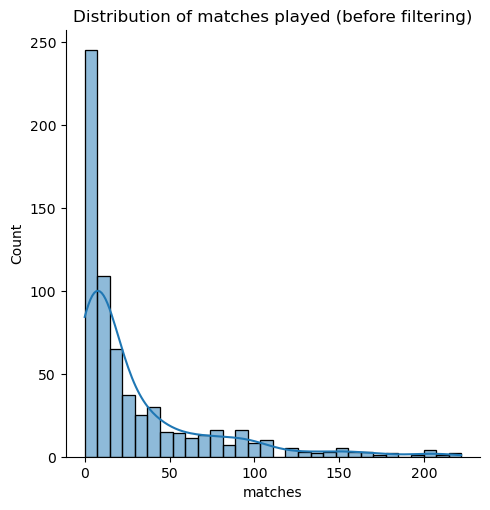

In [51]:
sns.displot(players['matches'],kde=True)
plt.title('Distribution of matches played (before filtering)')
plt.show()

In [52]:
players.shape


(656, 21)

In [53]:
CUTOFF_MATCHES = 10
players=players[players['matches']>=CUTOFF_MATCHES]

In [54]:
players.shape


(370, 21)

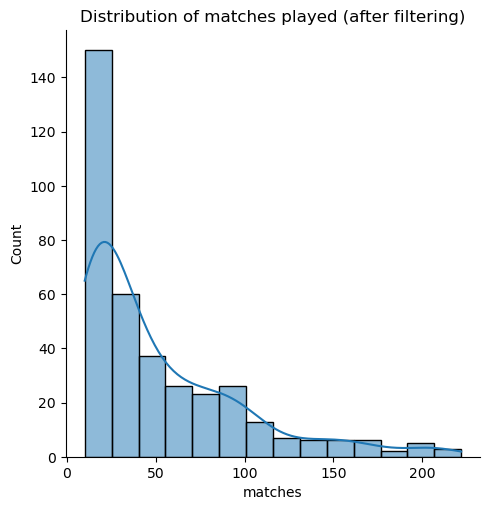

In [55]:
sns.displot(players['matches'],kde=True)
plt.title('Distribution of matches played (after filtering)')
plt.show()

<Axes: >

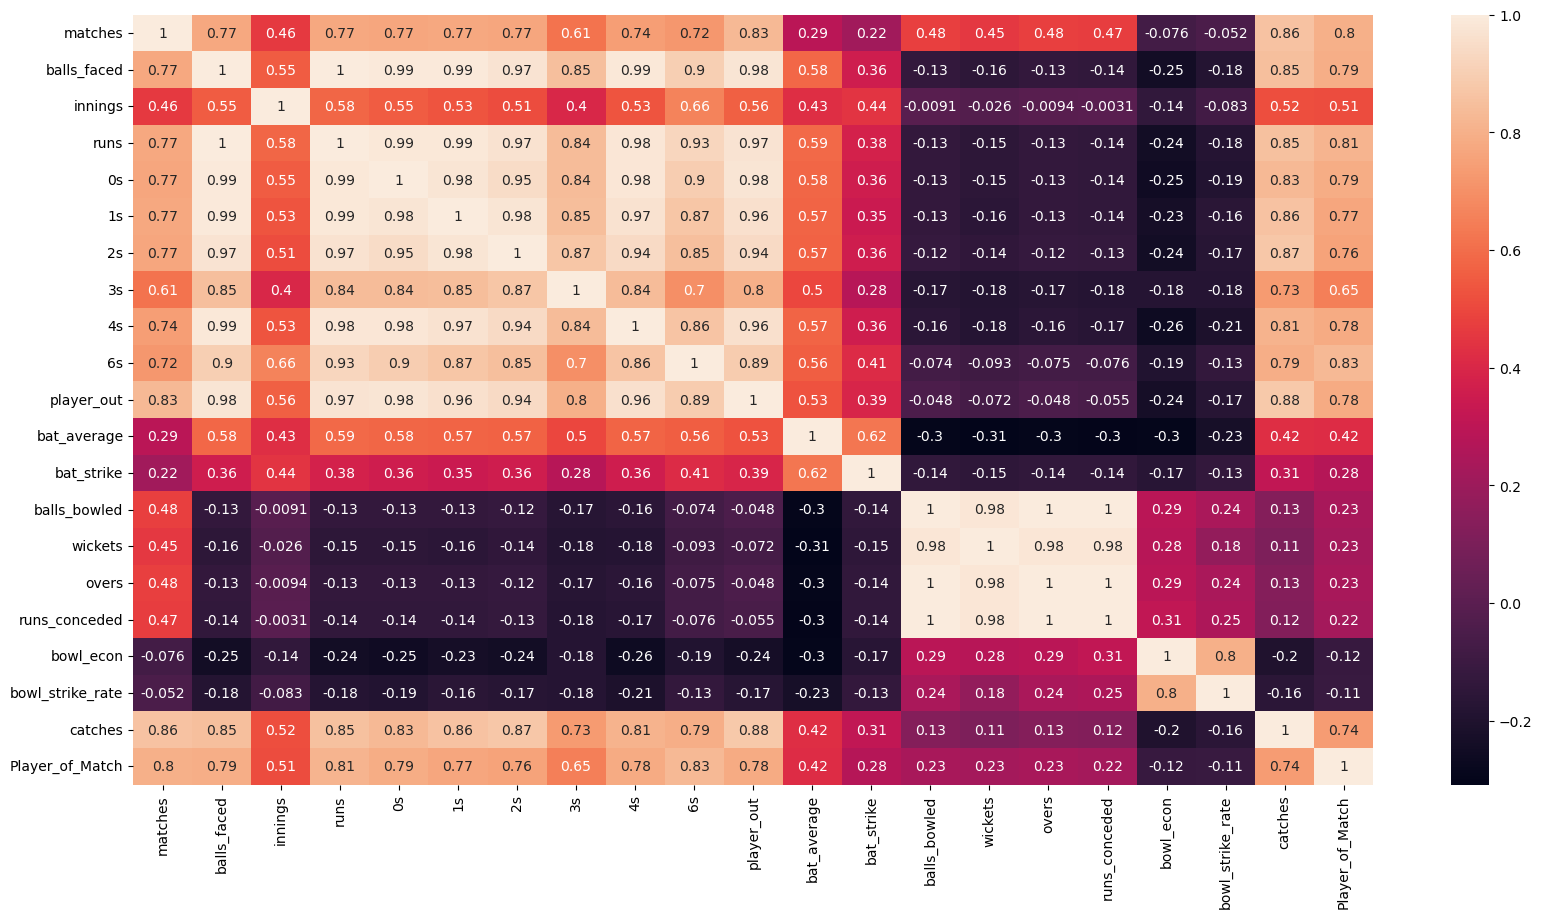

In [56]:
plt.figure(figsize=(20,10))
sns.heatmap(players.corr(),annot=True)

# 8. Removing Highly Correlated Columns¶


In [57]:
players.corr()

,matches,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike,balls_bowled,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate,catches,Player_of_Match
matches,1.000000,0.773570,0.462318,0.771124,0.766830,0.770777,0.767158,0.614194,0.741503,0.719891,0.828080,0.289992,0.216028,0.478081,0.454578,0.478019,0.470794,-0.075699,-0.052466,0.860273,0.795894
balls_faced,0.773570,1.000000,0.553111,0.996251,0.994002,0.992697,0.970332,0.847990,0.985199,0.898451,0.976068,0.582871,0.360354,-0.134756,-0.155026,-0.134852,-0.140132,-0.246333,-0.181466,0.850533,0.792044
innings,0.462318,0.553111,1.000000,0.578693,0.553242,0.531288,0.513462,0.400862,0.533860,0.659277,0.561535,0.425301,0.444877,-0.009148,-0.026290,-0.009413,-0.003127,-0.136622,-0.082738,0.516975,0.512684
runs,0.771124,0.996251,0.578693,1.000000,0.988162,0.986232,0.967006,0.838702,0.983507,0.925880,0.973144,0.588388,0.379078,-0.133344,-0.152765,-0.133456,-0.138157,-0.242659,-0.180007,0.853758,0.812101
0s,0.766830,0.994002,0.553242,0.988162,1.000000,0.975552,0.946806,0.836541,0.984431,0.897454,0.975747,0.577795,0.356351,-0.131309,-0.151032,-0.131408,-0.136897,-0.253531,-0.190931,0.826861,0.789481
1s,0.770777,0.992697,0.531288,0.986232,0.975552,1.000000,0.977735,0.845083,0.968374,0.871993,0.962686,0.574953,0.345169,-0.134723,-0.156210,-0.134803,-0.140076,-0.233203,-0.164100,0.859194,0.769546
2s,0.767158,0.970332,0.513462,0.967006,0.946806,0.977735,1.000000,0.867727,0.943595,0.849309,0.942895,0.568006,0.356583,-0.123061,-0.143708,-0.123155,-0.127574,-0.242740,-0.174145,0.874740,0.756597
3s,0.614194,0.847990,0.400862,0.838702,0.836541,0.845083,0.867727,1.000000,0.841007,0.695744,0.799634,0.495762,0.280939,-0.173277,-0.183625,-0.173315,-0.178084,-0.178740,-0.178985,0.729801,0.649972
4s,0.741503,0.985199,0.533860,0.983507,0.984431,0.968374,0.943595,0.841007,1.000000,0.864500,0.960315,0.574123,0.358855,-0.160348,-0.176967,-0.160446,-0.166815,-0.261363,-0.209873,0.809659,0.783344
6s,0.719891,0.898451,0.659277,0.925880,0.897454,0.871993,0.849309,0.695744,0.864500,1.000000,0.891980,0.558312,0.412513,-0.074491,-0.092928,-0.074658,-0.075570,-0.194122,-0.131651,0.794779,0.827138


In [58]:
def correlation(data,threshold):
    col_corr=set() #set to avoid duplicate values
    corr_matrix=players.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [59]:
corr_features=correlation(players,0.8)
corr_features

{'0s',
 '1s',
 '2s',
 '3s',
 '4s',
 '6s',
 'Player_of_Match',
 'catches',
 'overs',
 'player_out',
 'runs',
 'runs_conceded',
 'wickets'}

In [60]:
players_classified=players.drop(['0s',
 '1s',
 '2s',
 '3s',
 '4s',
 '6s',
 'Player_of_Match',
 'overs',
 'player_out',
 'runs',
 'runs_conceded',
 'wickets'],axis=1)

In [61]:
players_classified

,matches,balls_faced,innings,bat_average,bat_strike,balls_bowled,bowl_econ,bowl_strike_rate,catches
A Ashish Reddy,28.0,196.0,2.0,18.67,142.86,270.0,8.80,15.00,9.0
A Badoni,11.0,139.0,2.0,17.89,115.83,12.0,5.50,6.00,9.0
A Chandila,12.0,7.0,1.0,4.00,57.14,234.0,6.21,21.27,7.0
A Kumble,42.0,49.0,2.0,17.50,71.43,983.0,6.45,21.84,10.0
A Mishra,154.0,410.0,2.0,12.07,88.29,3317.0,7.19,19.98,21.0
...,...,...,...,...,...,...,...,...,...
YK Pathan,162.0,2334.0,3.0,29.03,138.05,1184.0,7.18,28.19,43.0
YS Chahal,130.0,89.0,2.0,6.17,41.57,2940.0,7.40,17.71,24.0
YV Takawale,10.0,183.0,2.0,24.00,104.92,0.0,0.00,0.00,13.0
Yuvraj Singh,129.0,2207.0,3.0,25.27,124.78,882.0,7.33,24.50,31.0


In [62]:
players_classified.isnull().sum()

matches             0
balls_faced         0
innings             0
bat_average         0
bat_strike          0
balls_bowled        0
bowl_econ           0
bowl_strike_rate    0
catches             0
dtype: int64

# 9. Scaling the Data

In [63]:
players_new = players_classified[np.isfinite(players_classified).all(1)]


In [64]:
players_new

,matches,balls_faced,innings,bat_average,bat_strike,balls_bowled,bowl_econ,bowl_strike_rate,catches
A Ashish Reddy,28.0,196.0,2.0,18.67,142.86,270.0,8.80,15.00,9.0
A Badoni,11.0,139.0,2.0,17.89,115.83,12.0,5.50,6.00,9.0
A Chandila,12.0,7.0,1.0,4.00,57.14,234.0,6.21,21.27,7.0
A Kumble,42.0,49.0,2.0,17.50,71.43,983.0,6.45,21.84,10.0
A Mishra,154.0,410.0,2.0,12.07,88.29,3317.0,7.19,19.98,21.0
...,...,...,...,...,...,...,...,...,...
YK Pathan,162.0,2334.0,3.0,29.03,138.05,1184.0,7.18,28.19,43.0
YS Chahal,130.0,89.0,2.0,6.17,41.57,2940.0,7.40,17.71,24.0
YV Takawale,10.0,183.0,2.0,24.00,104.92,0.0,0.00,0.00,13.0
Yuvraj Singh,129.0,2207.0,3.0,25.27,124.78,882.0,7.33,24.50,31.0


In [65]:
scaler=StandardScaler()

players_scaled=pd.DataFrame(scaler.fit_transform(players_new),columns=players_classified.columns)
players_scaled=players_scaled.set_index(players_new.index)
players_scaled.head()


,matches,balls_faced,innings,bat_average,bat_strike,balls_bowled,bowl_econ,bowl_strike_rate,catches
A Ashish Reddy,-0.502021,-0.406436,-0.162524,0.061094,1.139137,-0.438153,0.796860,-0.299156,-0.413577
A Badoni,-0.873220,-0.470388,-0.162524,-0.011383,0.263068,-0.770296,-0.152777,-0.970846,-0.413577
A Chandila,-0.851385,-0.618486,-2.090399,-1.302031,-1.639133,-0.484499,0.051539,0.168788,-0.506141
A Kumble,-0.196327,-0.571364,-0.162524,-0.047621,-1.175980,0.479746,0.120604,0.211328,-0.367295
A Mishra,2.249222,-0.166337,-0.162524,-0.552173,-0.629531,3.484480,0.333553,0.072513,0.141806


# 10. K-Means clustering
# 10.1 Finding the number of clusters using elbow plot

In [66]:
k_range=range(1,12)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(players_scaled)
    sse.append(km.inertia_)
sse

[3096.0,
 2252.79997062666,
 1722.8653555579028,
 1423.78258129417,
 1165.4440897493237,
 1071.5887278402734,
 976.0029198398555,
 910.5763550573497,
 843.7638187826722,
 781.7792784618061,
 745.6178606279238]

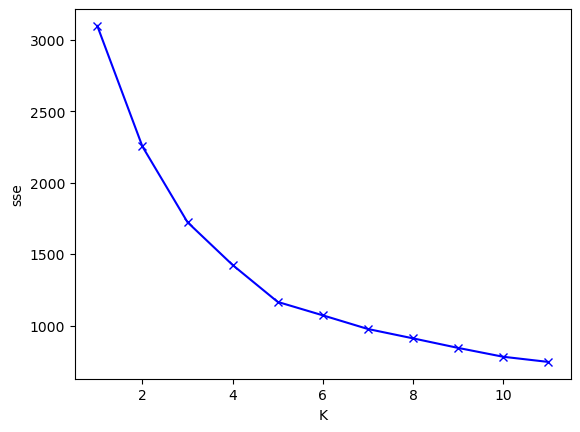

In [67]:
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_range,sse,'bx-')

# Cluster=5¶


In [68]:
km = KMeans(n_clusters=5)
y_pred=km.fit_predict(players_scaled)
players_new['cluster']=y_pred

In [69]:
players_new

,matches,balls_faced,innings,bat_average,bat_strike,balls_bowled,bowl_econ,bowl_strike_rate,catches,cluster
A Ashish Reddy,28.0,196.0,2.0,18.67,142.86,270.0,8.80,15.00,9.0,0
A Badoni,11.0,139.0,2.0,17.89,115.83,12.0,5.50,6.00,9.0,3
A Chandila,12.0,7.0,1.0,4.00,57.14,234.0,6.21,21.27,7.0,2
A Kumble,42.0,49.0,2.0,17.50,71.43,983.0,6.45,21.84,10.0,2
A Mishra,154.0,410.0,2.0,12.07,88.29,3317.0,7.19,19.98,21.0,4
...,...,...,...,...,...,...,...,...,...,...
YK Pathan,162.0,2334.0,3.0,29.03,138.05,1184.0,7.18,28.19,43.0,1
YS Chahal,130.0,89.0,2.0,6.17,41.57,2940.0,7.40,17.71,24.0,4
YV Takawale,10.0,183.0,2.0,24.00,104.92,0.0,0.00,0.00,13.0,3
Yuvraj Singh,129.0,2207.0,3.0,25.27,124.78,882.0,7.33,24.50,31.0,1


# Considering Players who have played more than 50 matches

In [70]:
top_players=players_new.loc[players_new['matches']>50]


In [71]:
top_players

,matches,balls_faced,innings,bat_average,bat_strike,balls_bowled,bowl_econ,bowl_strike_rate,catches,cluster
A Mishra,154.0,410.0,2.0,12.07,88.29,3317.0,7.19,19.98,21.0,4
A Nehra,88.0,63.0,2.0,5.12,65.08,1974.0,7.58,18.62,19.0,4
AB Dinda,76.0,50.0,2.0,2.89,52.00,1589.0,7.82,23.03,7.0,2
AB de Villiers,170.0,3487.0,4.0,41.45,148.58,0.0,0.00,0.00,120.0,1
AC Gilchrist,80.0,1555.0,2.0,27.22,133.05,1.0,0.00,1.00,51.0,3
...,...,...,...,...,...,...,...,...,...,...
Y Venugopal Rao,57.0,865.0,2.0,23.45,113.87,222.0,9.11,37.00,13.0,0
YK Pathan,162.0,2334.0,3.0,29.03,138.05,1184.0,7.18,28.19,43.0,1
YS Chahal,130.0,89.0,2.0,6.17,41.57,2940.0,7.40,17.71,24.0,4
Yuvraj Singh,129.0,2207.0,3.0,25.27,124.78,882.0,7.33,24.50,31.0,1


In [72]:
top_players.reset_index(inplace=True)
top_players = top_players.rename(columns = {'index':'names'})
top_players_cluster=pd.DataFrame(top_players[['names','cluster']])

In [73]:
top_players_cluster

,names,cluster
0,A Mishra,4
1,A Nehra,4
2,AB Dinda,2
3,AB de Villiers,1
4,AC Gilchrist,3
...,...,...
116,Y Venugopal Rao,0
117,YK Pathan,1
118,YS Chahal,4
119,Yuvraj Singh,1


In [74]:
top_players_cluster['cluster'].value_counts()

4    39
1    29
0    25
3    15
2    13
Name: cluster, dtype: int64

In [75]:
teams1=top_players_cluster.loc[top_players_cluster['cluster']==0]
teams1=teams1['names'].tolist()


In [76]:
teams1

['AJ Finch',
 'AM Nayar',
 'BJ Hodge',
 'DJ Hooda',
 'DJ Hussey',
 'DL Chahar',
 'DR Smith',
 'JP Duminy',
 'JP Faulkner',
 'KV Sharma',
 'Kuldeep Yadav',
 'M Kartik',
 'MC Henriques',
 'MG Johnson',
 'MJ McClenaghan',
 'MK Tiwary',
 'MP Stoinis',
 'N Rana',
 'R Tewatia',
 'RD Chahar',
 'SC Ganguly',
 'STR Binny',
 'TG Southee',
 'V Sehwag',
 'Y Venugopal Rao']

In [77]:
teams2=top_players_cluster.loc[top_players_cluster['cluster']==1]
teams2=teams2['names'].tolist()

In [78]:
teams2

['AB de Villiers',
 'AM Rahane',
 'AT Rayudu',
 'BB McCullum',
 'CH Gayle',
 'DA Miller',
 'G Gambhir',
 'GJ Maxwell',
 'HH Pandya',
 'JC Buttler',
 'KA Pollard',
 'KD Karthik',
 'KL Rahul',
 'MA Agarwal',
 'MK Pandey',
 'MS Dhoni',
 'PA Patel',
 'Q de Kock',
 'RG Sharma',
 'RR Pant',
 'RV Uthappa',
 'S Dhawan',
 'SK Raina',
 'SR Watson',
 'SV Samson',
 'V Kohli',
 'WP Saha',
 'YK Pathan',
 'Yuvraj Singh']

In [79]:
teams3=top_players_cluster.loc[top_players_cluster['cluster']==2]
teams3=teams3['names'].tolist()



In [80]:
teams3

['AB Dinda',
 'Imran Tahir',
 'L Balaji',
 'M Muralitharan',
 'M Prasidh Krishna',
 'MM Patel',
 'Mohammed Siraj',
 'PP Ojha',
 'S Kaul',
 'S Nadeem',
 'SB Jakati',
 'SK Trivedi',
 'SK Warne']

In [81]:
teams4=top_players_cluster.loc[top_players_cluster['cluster']==3]
teams4=teams4['names'].tolist()



In [82]:
teams4

['AC Gilchrist',
 'DPMD Jayawardene',
 'EJG Morgan',
 'Ishan Kishan',
 'KC Sangakkara',
 'KK Nair',
 'KM Jadhav',
 'MEK Hussey',
 'NV Ojha',
 'PP Shaw',
 'R Dravid',
 'S Badrinath',
 'SE Marsh',
 'SS Tiwary',
 'Shubman Gill']

In [83]:
teams5=top_players_cluster.loc[top_players_cluster['cluster']==4]
teams5=teams5['names'].tolist()

In [84]:
teams5

['A Mishra',
 'A Nehra',
 'AD Russell',
 'AR Patel',
 'B Kumar',
 'CH Morris',
 'DJ Bravo',
 'DS Kulkarni',
 'DW Steyn',
 'HV Patel',
 'Harbhajan Singh',
 'I Sharma',
 'IK Pathan',
 'JA Morkel',
 'JD Unadkat',
 'JH Kallis',
 'JJ Bumrah',
 'K Rabada',
 'KH Pandya',
 'M Morkel',
 'MM Sharma',
 'Mohammed Shami',
 'P Kumar',
 'PP Chawla',
 'R Ashwin',
 'R Bhatia',
 'R Vinay Kumar',
 'RA Jadeja',
 'RP Singh',
 'Rashid Khan',
 'SL Malinga',
 'SN Thakur',
 'SP Narine',
 'Sandeep Sharma',
 'Shakib Al Hasan',
 'TA Boult',
 'UT Yadav',
 'YS Chahal',
 'Z Khan']

# 11. Obtaining the Teams

In [85]:
total_teams_df=pd.DataFrame(teams4,columns=['teams4'])

In [86]:
total_teams_df

,teams4
0,AC Gilchrist
1,DPMD Jayawardene
2,EJG Morgan
3,Ishan Kishan
4,KC Sangakkara
5,KK Nair
6,KM Jadhav
7,MEK Hussey
8,NV Ojha
9,PP Shaw


In [87]:
total_teams_df['teams1']=pd.Series(teams1)
total_teams_df['teams2']=pd.Series(teams2)
total_teams_df['teams3']=pd.Series(teams3)
total_teams_df['teams5']=pd.Series(teams5)
total_teams_df=total_teams_df.fillna('')



In [88]:
total_teams_df

,teams4,teams1,teams2,teams3,teams5
0,AC Gilchrist,AJ Finch,AB de Villiers,AB Dinda,A Mishra
1,DPMD Jayawardene,AM Nayar,AM Rahane,Imran Tahir,A Nehra
2,EJG Morgan,BJ Hodge,AT Rayudu,L Balaji,AD Russell
3,Ishan Kishan,DJ Hooda,BB McCullum,M Muralitharan,AR Patel
4,KC Sangakkara,DJ Hussey,CH Gayle,M Prasidh Krishna,B Kumar
5,KK Nair,DL Chahar,DA Miller,MM Patel,CH Morris
6,KM Jadhav,DR Smith,G Gambhir,Mohammed Siraj,DJ Bravo
7,MEK Hussey,JP Duminy,GJ Maxwell,PP Ojha,DS Kulkarni
8,NV Ojha,JP Faulkner,HH Pandya,S Kaul,DW Steyn
9,PP Shaw,KV Sharma,JC Buttler,S Nadeem,HV Patel


In [89]:
total_teams_df=total_teams_df[['teams1','teams2','teams3','teams4','teams5']]

total_teams_df

,teams1,teams2,teams3,teams4,teams5
0,AJ Finch,AB de Villiers,AB Dinda,AC Gilchrist,A Mishra
1,AM Nayar,AM Rahane,Imran Tahir,DPMD Jayawardene,A Nehra
2,BJ Hodge,AT Rayudu,L Balaji,EJG Morgan,AD Russell
3,DJ Hooda,BB McCullum,M Muralitharan,Ishan Kishan,AR Patel
4,DJ Hussey,CH Gayle,M Prasidh Krishna,KC Sangakkara,B Kumar
5,DL Chahar,DA Miller,MM Patel,KK Nair,CH Morris
6,DR Smith,G Gambhir,Mohammed Siraj,KM Jadhav,DJ Bravo
7,JP Duminy,GJ Maxwell,PP Ojha,MEK Hussey,DS Kulkarni
8,JP Faulkner,HH Pandya,S Kaul,NV Ojha,DW Steyn
9,KV Sharma,JC Buttler,S Nadeem,PP Shaw,HV Patel


In [90]:
teams1=top_players.loc[top_players['cluster']==0]
teams2=top_players.loc[top_players['cluster']==1]
teams3=top_players.loc[top_players['cluster']==2]
teams4=top_players.loc[top_players['cluster']==3]
teams5=top_players.loc[top_players['cluster']==4]
teams1.head()

,names,matches,balls_faced,innings,bat_average,bat_strike,balls_bowled,bowl_econ,bowl_strike_rate,catches,cluster
6,AJ Finch,90.0,1696.0,3.0,24.90,123.35,44.0,9.57,44.00,29.0,0
7,AM Nayar,51.0,588.0,2.0,17.23,114.29,239.0,8.05,26.56,13.0,0
13,BJ Hodge,63.0,1153.0,2.0,30.43,121.42,238.0,7.58,14.00,22.0,0
18,DJ Hooda,80.0,970.0,3.0,21.33,127.53,359.0,8.35,35.90,42.0,0
19,DJ Hussey,61.0,1101.0,2.0,26.98,120.07,323.0,8.78,40.38,25.0,0


In [91]:
teams2.head()

,names,matches,balls_faced,innings,bat_average,bat_strike,balls_bowled,bowl_econ,bowl_strike_rate,catches,cluster
3,AB de Villiers,170.0,3487.0,4.0,41.45,148.58,0.0,0.00,0.00,120.0,1
8,AM Rahane,148.0,3465.0,2.0,30.63,117.58,6.0,5.00,6.00,63.0,1
10,AT Rayudu,175.0,3375.0,2.0,29.51,124.15,0.0,0.00,0.00,62.0,1
12,BB McCullum,109.0,2272.0,4.0,27.19,126.85,0.0,0.00,0.00,38.0,1
14,CH Gayle,141.0,3516.0,5.0,39.04,142.12,584.0,7.52,32.44,30.0,1


In [92]:
teams3.head()

,names,matches,balls_faced,innings,bat_average,bat_strike,balls_bowled,bowl_econ,bowl_strike_rate,catches,cluster
2,AB Dinda,76.0,50.0,2.0,2.89,52.00,1589.0,7.82,23.03,7.0,2
33,Imran Tahir,59.0,37.0,2.0,8.25,89.19,1340.0,7.64,16.34,13.0,2
52,L Balaji,73.0,50.0,2.0,5.14,72.00,1574.0,7.74,20.71,11.0,2
55,M Muralitharan,66.0,30.0,2.0,3.33,66.67,1581.0,6.46,24.70,15.0,2
56,M Prasidh Krishna,51.0,24.0,2.0,4.50,37.50,1231.0,8.35,24.62,9.0,2


In [93]:
teams4.head()

,names,matches,balls_faced,innings,bat_average,bat_strike,balls_bowled,bowl_econ,bowl_strike_rate,catches,cluster
4,AC Gilchrist,80.0,1555.0,2.0,27.22,133.05,1.0,0.0,1.0,51.0,3
21,DPMD Jayawardene,78.0,1522.0,3.0,28.25,118.79,0.0,0.0,0.0,33.0,3
25,EJG Morgan,75.0,1181.0,3.0,23.05,119.05,0.0,0.0,0.0,36.0,3
34,Ishan Kishan,70.0,1444.0,2.0,30.16,129.50,0.0,0.0,0.0,33.0,3
44,KC Sangakkara,68.0,1424.0,2.0,24.45,118.47,0.0,0.0,0.0,45.0,3


In [94]:
teams5.head()

,names,matches,balls_faced,innings,bat_average,bat_strike,balls_bowled,bowl_econ,bowl_strike_rate,catches,cluster
0,A Mishra,154.0,410.0,2.0,12.07,88.29,3317.0,7.19,19.98,21.0,4
1,A Nehra,88.0,63.0,2.0,5.12,65.08,1974.0,7.58,18.62,19.0,4
5,AD Russell,95.0,1212.0,3.0,30.89,168.23,1484.0,8.82,16.67,27.0,4
9,AR Patel,122.0,919.0,2.0,19.24,123.50,2599.0,7.13,25.73,55.0,4
11,B Kumar,146.0,259.0,2.0,8.61,93.05,3384.0,7.04,21.97,29.0,4


# 12. Understanding the Players in term of their Economical Bowling
1. Players with more number of balls delivered are experienced bowler
2. Players with less number of balls delivered are usually batsmen

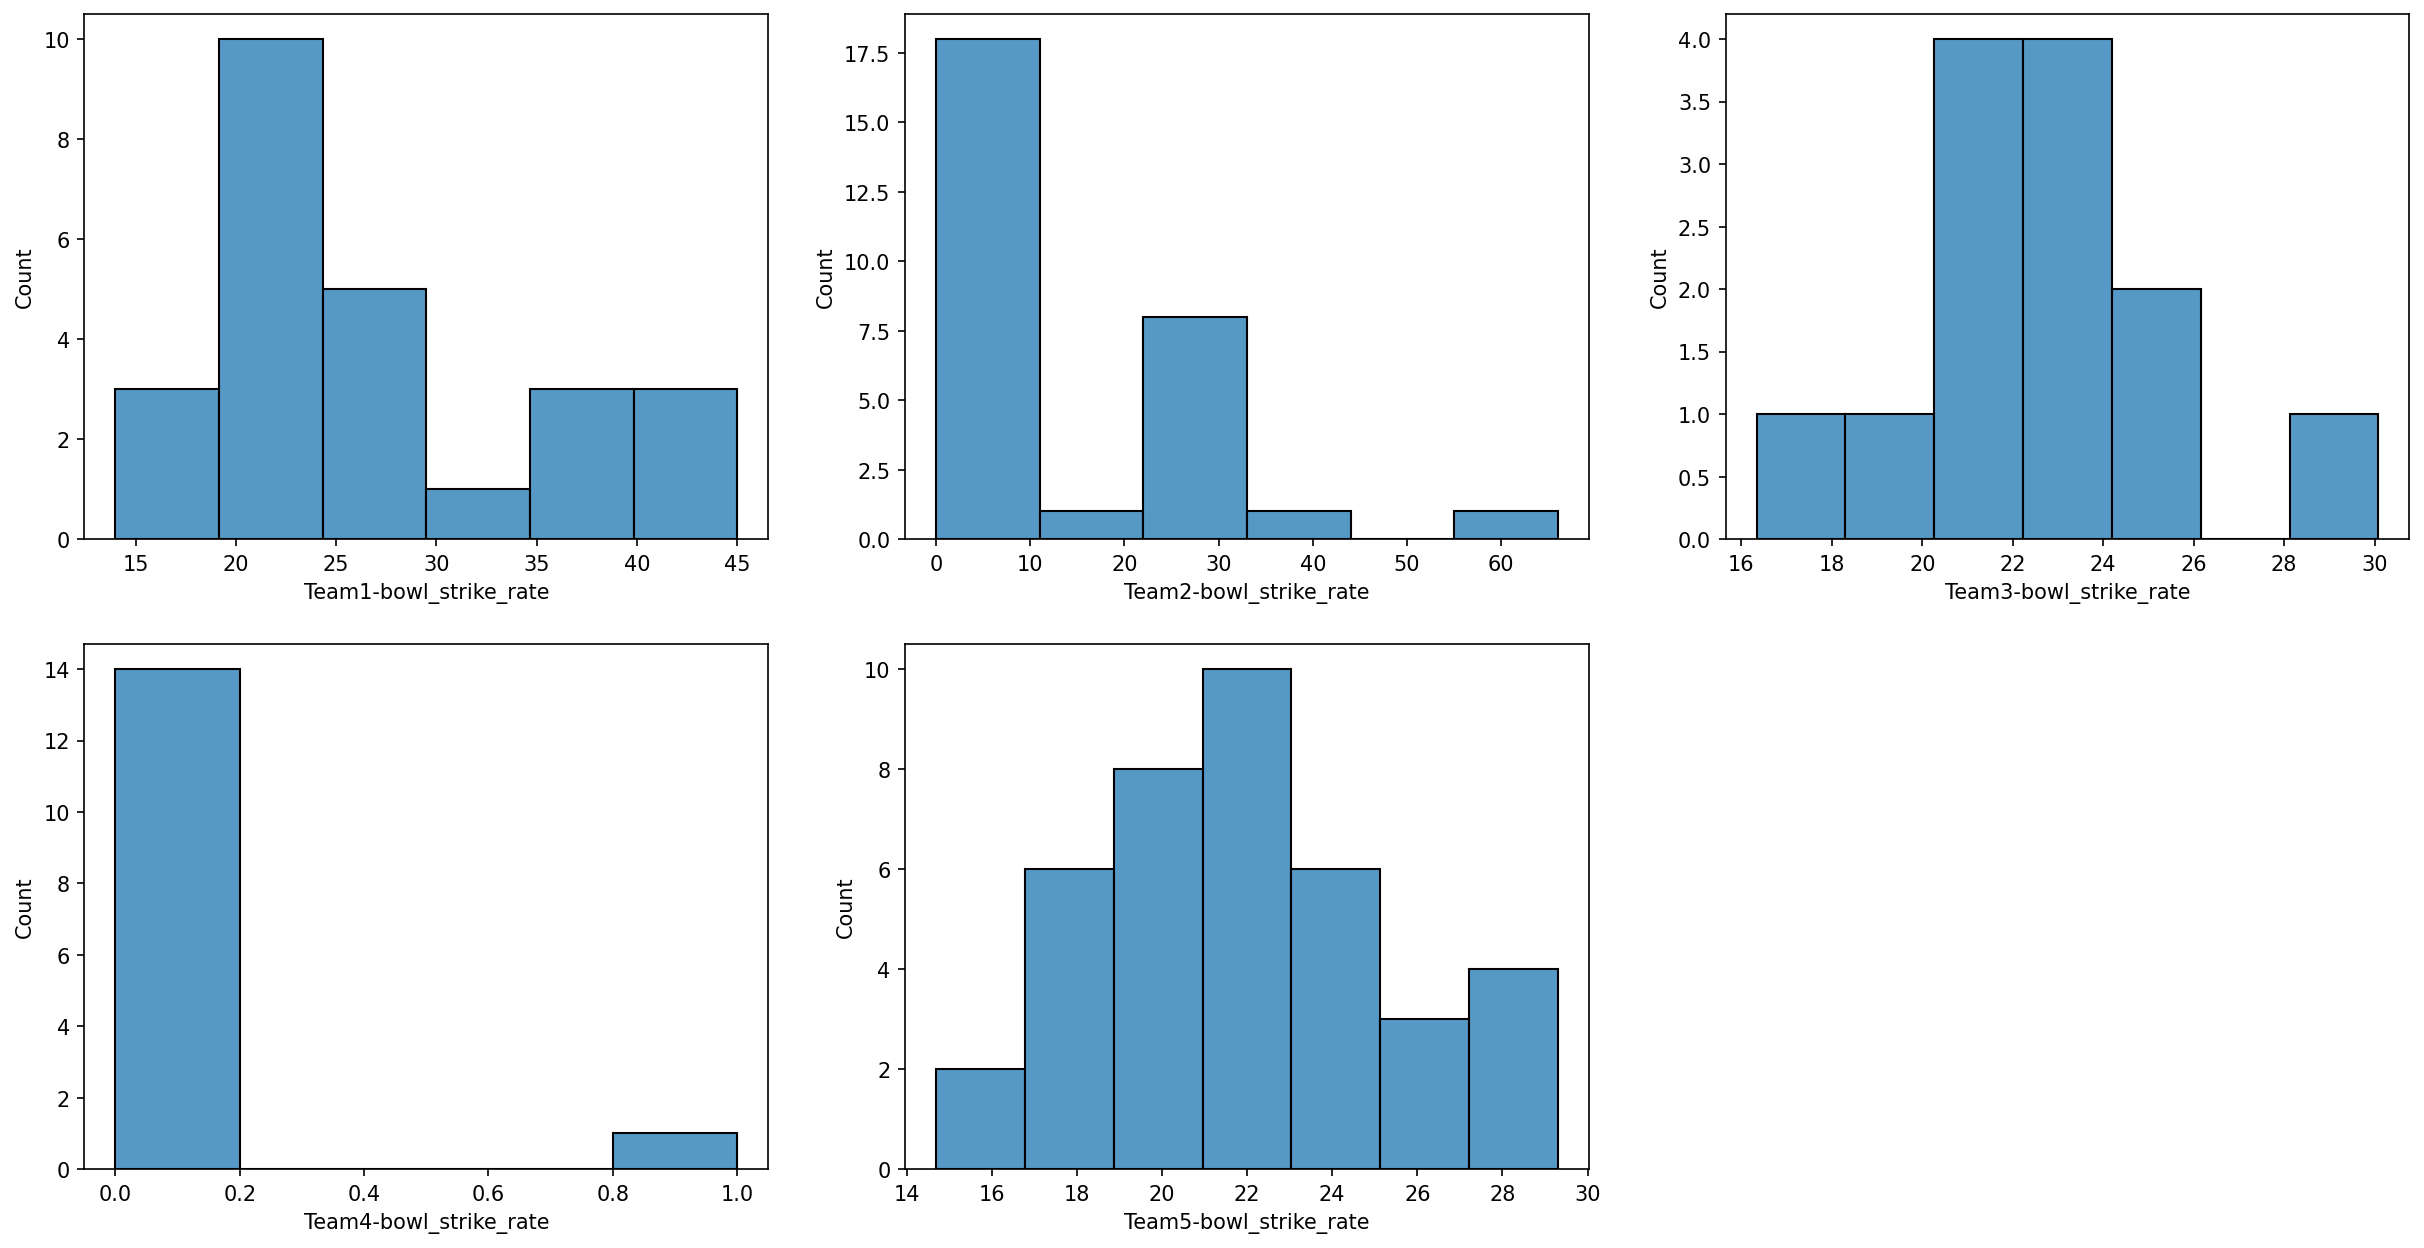

In [95]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,3,1)
sns.histplot(teams1['bowl_strike_rate'])
plt.xlabel('Team1-bowl_strike_rate')

plt.subplot(2,3,2)
sns.histplot(teams2['bowl_strike_rate'])
plt.xlabel('Team2-bowl_strike_rate')

plt.subplot(2,3,3)
sns.histplot(teams3['bowl_strike_rate'])
plt.xlabel('Team3-bowl_strike_rate')

plt.subplot(2,3,4)
sns.histplot(teams4['bowl_strike_rate'])
plt.xlabel('Team4-bowl_strike_rate')

plt.subplot(2,3,5)
sns.histplot(teams5['bowl_strike_rate'])
plt.xlabel('Team5-bowl_strike_rate')

plt.show()

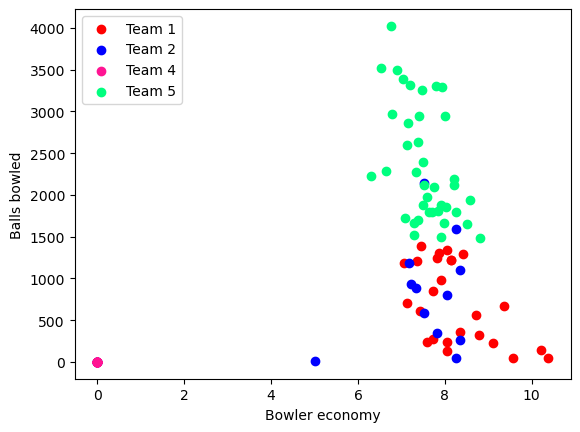

In [96]:
plt.xlabel('Bowler economy')
plt.ylabel('Balls bowled')

plt.scatter(teams1['bowl_econ'],teams1['balls_bowled'],color='r')
plt.scatter(teams2['bowl_econ'],teams2['balls_bowled'],color='b')
plt.scatter(teams4['bowl_econ'],teams4['balls_bowled'],color='deeppink')
plt.scatter(teams5['bowl_econ'],teams5['balls_bowled'],color='springgreen')

plt.legend(['Team 1', 'Team 2', 'Team 4', 'Team 5'], loc='upper left')

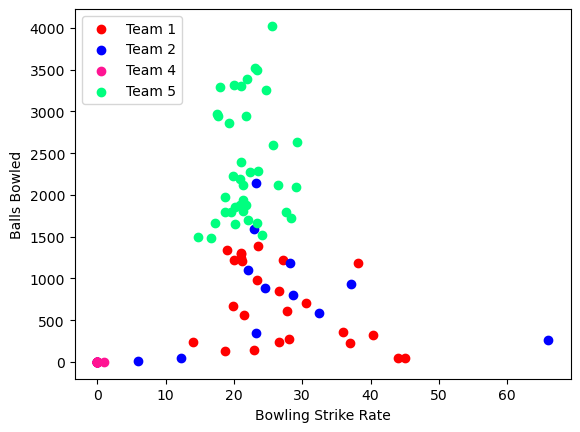

In [97]:
plt.xlabel('Bowling Strike Rate')
plt.ylabel('Balls Bowled')

plt.scatter(teams1['bowl_strike_rate'],teams1['balls_bowled'],color='r')
plt.scatter(teams2['bowl_strike_rate'],teams2['balls_bowled'],color='b')
plt.scatter(teams4['bowl_strike_rate'],teams4['balls_bowled'],color='deeppink')
plt.scatter(teams5['bowl_strike_rate'],teams5['balls_bowled'],color='springgreen')


plt.legend(['Team 1', 'Team 2', 'Team 4', 'Team 5'], loc='upper left')

# 13. Understanding the batting skills of players¶


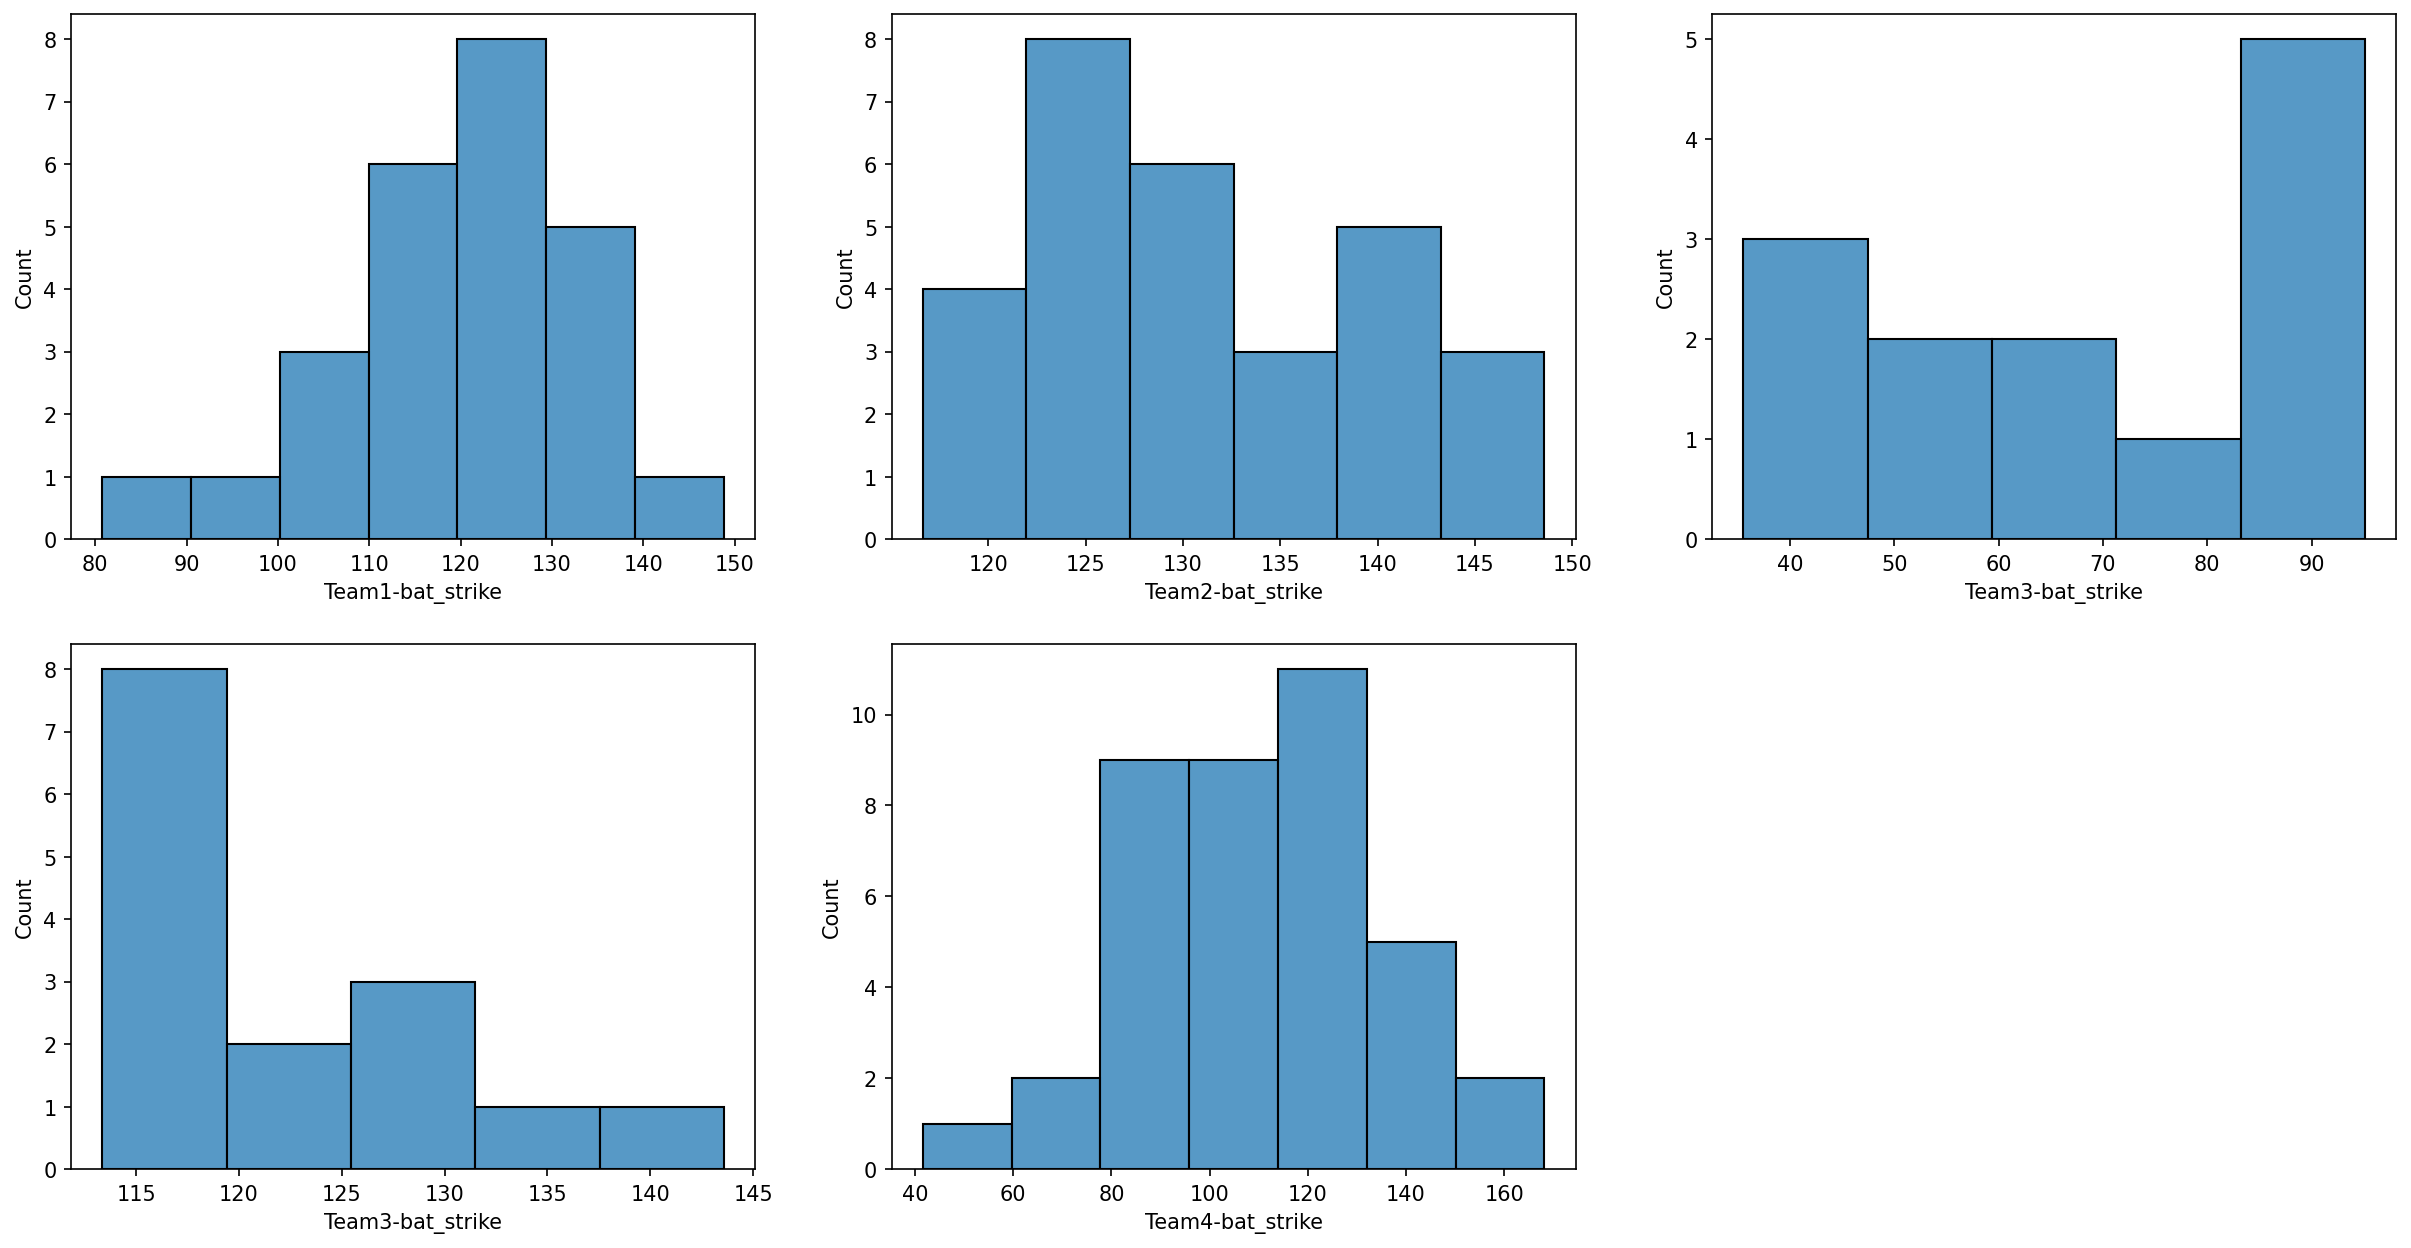

In [98]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,3,1)
sns.histplot(teams1['bat_strike'])
plt.xlabel('Team1-bat_strike')

plt.subplot(2,3,2)
sns.histplot(teams2['bat_strike'])
plt.xlabel('Team2-bat_strike')

plt.subplot(2,3,3)
sns.histplot(teams3['bat_strike'])
plt.xlabel('Team3-bat_strike')

plt.subplot(2,3,4)
sns.histplot(teams4['bat_strike'])
plt.xlabel('Team3-bat_strike')

plt.subplot(2,3,5)
sns.histplot(teams5['bat_strike'])
plt.xlabel('Team4-bat_strike')

plt.show()

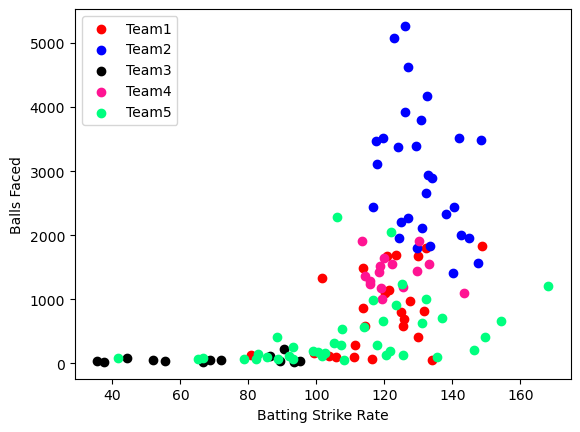

In [99]:
plt.xlabel('Batting Strike Rate')
plt.ylabel('Balls Faced')

plt.scatter(teams1['bat_strike'],teams1['balls_faced'],color='r')
plt.scatter(teams2['bat_strike'],teams2['balls_faced'],color='b')
plt.scatter(teams3['bat_strike'],teams3['balls_faced'],color='black')
plt.scatter(teams4['bat_strike'],teams4['balls_faced'],color='deeppink')
plt.scatter(teams5['bat_strike'],teams5['balls_faced'],color='springgreen')

plt.legend(['Team1','Team2','Team3','Team4','Team5'],loc='upper left')

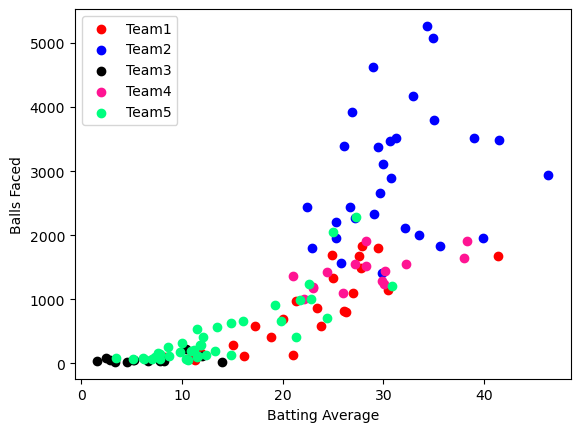

In [100]:
plt.xlabel('Batting Average')
plt.ylabel('Balls Faced')

plt.scatter(teams1['bat_average'],teams1['balls_faced'],color='r')
plt.scatter(teams2['bat_average'],teams2['balls_faced'],color='b')
plt.scatter(teams3['bat_average'],teams3['balls_faced'],color='black')
plt.scatter(teams4['bat_average'],teams4['balls_faced'],color='deeppink')
plt.scatter(teams5['bat_average'],teams5['balls_faced'],color='springgreen')


plt.legend(['Team1','Team2','Team3','Team4','Team5'],loc='upper left')